In [29]:
import numpy as nm;
import pandas as pd;


In [30]:
dataset = pd.read_csv('Leetcode.csv')

In [31]:
dataset.head()

,username,total,easy,medium,hard,rating,C++,Java,Python,Python3,...,Reservoir Sampling,Strongly Connected Component,Eulerian Circuit,Radix Sort,Rejection Sampling,Biconnected Component,contestAttended,streak,totalActiveDays,OurRating
0,sudhanshu_090,561,181,334,46,2100.37400,1,1,0,0,...,0,0,0,0,0,0,32,18,114,0
1,aryansharma1606,426,155,226,45,1509.48800,1,1,0,0,...,0,0,0,0,0,0,11,0,0,0
2,mahadevwardule17,581,165,333,83,2045.53146,1,1,0,0,...,0,0,0,0,0,0,47,11,156,0
3,jamshedmd1111,321,89,166,66,2623.66600,1,0,0,0,...,0,0,0,0,0,0,35,14,77,0
4,Beyonder19,422,337,77,8,1364.44000,1,1,0,1,...,0,0,0,0,0,0,17,0,0,0


In [32]:
# linear regression
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split

In [33]:
X = dataset.drop(['username','OurRating'],axis=1)
y = dataset.iloc[:,-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [35]:
regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test,y_test))

1.0


In [ ]:
# Randomo Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)
print(rf_regressor.score(X_test,y_test))

1.0


In [ ]:

#representation

3.141592653589793


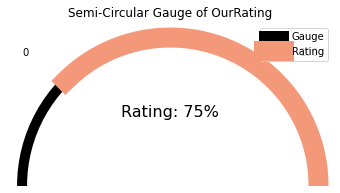

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Define the rating value (replace 75 with your actual rating)
rating_value = 75

# Create a semi-circular gauge
fig, ax = plt.subplots(figsize=(6, 3))

# Set minimum and maximum values
min_value = 0
max_value = 100

print(np.pi)

# Draw a semi-circle representing the gauge
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
ax.plot(x, y, color='black', lw=10, label='Gauge')

# Color map for rating arc
cmap = plt.cm.coolwarm  # Adjust colormap as desired

# Draw an arc representing the rating
theta_rating = np.linspace(0, rating_value / 100 * np.pi, 100)
x_rating = np.cos(theta_rating)
y_rating = np.sin(theta_rating)
rating_color = cmap(rating_value / max_value)  # Scale color based on rating
ax.plot(x_rating, y_rating, color=rating_color, lw=20, label='Rating')

# Set aspect ratio and limits
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(0, 1.1)

# Hide axes and add labels
ax.axis('off')
ax.text(-1, 0.9, f"{min_value}", ha='left', va='center')
ax.text(1, 0.9, f"{max_value}", ha='right', va='center')

# Add title and legend (optional)
plt.title('Semi-Circular Gauge of OurRating')
plt.legend()  # Uncomment to show legend

# Display rating value
rating_text = f"Rating: {rating_value}%"
ax.text(0, 0.5, rating_text, ha='center', va='center', fontsize=16)

plt.show()


In [3]:
#languages
import pandas as pd
data = pd.read_csv('Leetcode.csv')

In [4]:


def select_row_by_pandas(filename, condition_column, target_value):
  
  data = pd.read_csv(filename)
  return data[data[condition_column] == target_value].iloc[0] if not data.empty else None

# Example Usage (assuming you have a header row)
filename = 'Leetcode.csv'
condition_column = 'username'  # Assuming 'username' is the column name
target_value = 'iAmritSingh'

selected_row = select_row_by_pandas(filename, condition_column, target_value)

if selected_row is not None:
  print("Selected Row:")
  print(selected_row)
else:
  print("No row found matching the condition.")


Selected Row:
username                 iAmritSingh
total                            207
easy                              53
medium                           138
hard                              16
                            ...     
Biconnected Component              0
contestAttended                    8
streak                            11
totalActiveDays                   92
OurRating                          0
Name: 49, Length: 106, dtype: object


In [6]:
print(selected_row[-1])

0
